In [2]:
!pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
from qiskit import *

In [4]:
circuits = QuantumCircuit(4)

In [5]:
circuits.h(0)
circuits.cx(0, 1)
circuits.cx(0, 2)
circuits.cx(0, 3)

In [6]:
!pip install pylatexenc
#!pip install MatplotlibDrawer
#from pylatexenc import MatplotlibDrawer as mpl
circuits.draw()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [7]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [8]:
job = execute(circuits, Aer.get_backend('statevector_simulator'))

In [9]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [10]:
result = job.result()
print(result)

Result(backend_name='statevector_simulator', backend_version='0.9.1', qobj_id='1ad6dea5-6672-42d9-bb8c-640dd85cce34', job_id='e37d123b-3a5e-4eb5-bcbe-f3c874c05dea', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(statevector=[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=4, name='circuit-0', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, seed_simulator=2034824537, metadata={'parallel_state_update': 3, 'noise': 'ideal', 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 4, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'statevector', 'active_input_qubits': [

In [11]:
outputstate = result.get_statevector(circuits, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.707+0.j]


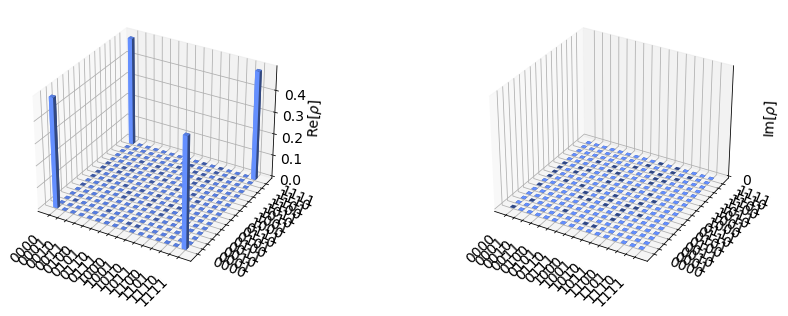

In [12]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [13]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circuits, backend)
result = job.result()

# Show the results
print(result.get_unitary(circuits, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0. 

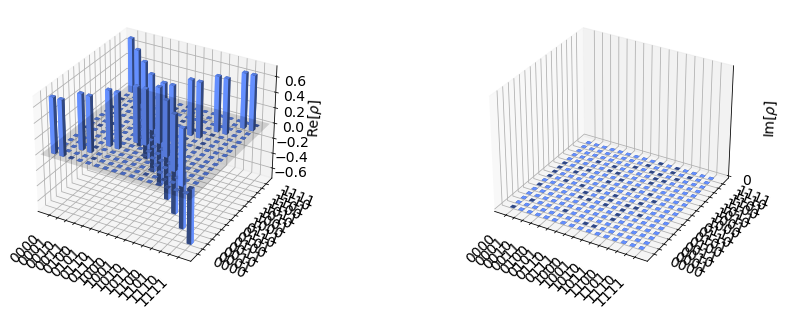

In [14]:
outputstate = result.get_unitary(circuits, decimals=3)
plot_state_city(outputstate)

In [15]:

meas = QuantumCircuit(4, 4)
meas.barrier(range(4))
meas.measure(range(4), range(4))

qc = circuits + meas

qc.draw()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  """
/usr/local/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌───┐                ░ ┌─┐         
q_0: ┤ H ├──■────■────■───░─┤M├─────────
     └───┘┌─┴─┐  │    │   ░ └╥┘┌─┐      
q_1: ─────┤ X ├──┼────┼───░──╫─┤M├──────
          └───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
q_2: ──────────┤ X ├──┼───░──╫──╫─┤M├───
               └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                    └───┘ ░  ║  ║  ║ └╥┘
c: 4/════════════════════════╩══╩══╩══╩═
                             0  1  2  3

In [16]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [17]:
result_sim.status

'COMPLETED'

In [18]:

counts = result_sim.get_counts(qc)
print(counts)

{'1111': 520, '0000': 504}


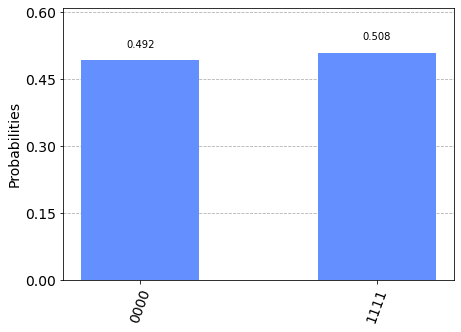

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)